In [181]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
import seaborn as sns
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

from itertools import chain
from pathlib import Path
from datetime import datetime
from pandas.io.pytables import PossibleDataLossError
from sklearn import datasets

In [2]:
today_str = datetime.today().strftime('%Y%m%d')
print(today_str)

20220401


In [443]:
root = Path('/data/ab01/to_dujiewen')
train_data_paths = [root/f'CM00{i}_train_clone-pass_germ-pass.tsv' for i in [0,1,2,3,4,5]]
valid_data_paths = [root/f'CM00{i}_valid_clone-pass.tsv' for i in [1,2,3,4,5]]

## CM004
|file_name|row_count(except header)|
|---|---|
|CM004_all.bcr.samples.IGHV.igblast.tsv|28339
|CM004_all.tsv|27687
|CM004_all_clone-pass.tsv|27681
|CM004_clone-pass_germ-pass.tsv|2435
|CM004_valid_clone-pass.tsv|880
|CM004_unknown_clone-pass_germ-pass.tsv|19778
|CM004_train_clone-pass_germ-pass.tsv|26801

CM004_all_clone-pass.tsv：训练集+验证集混合推断clonotype</br>
CM004_clone-pass_germ-pass.tsv：CM004_all_clone-pass.tsv中只含有验证集序列的clonotype</br>
CM004_unknown_clone-pass_germ-pass.tsv：CM004_all_clone-pass.tsv中只含有训练集序列的clonotype</br>
## CM005
|file_name|row_count(except header)|
|---|---|
|CM005_all.bcr.samples.IGHV.igblast.tsv|2005
|CM005_all.tsv|1963
|CM005_all_clone-pass.tsv|1963
|CM005_clone-pass_germ-pass.tsv|150
|CM005_valid_clone-pass.tsv|160
|CM005_unknown_clone-pass_germ-pass.tsv|1204
|CM005_train_clone-pass_germ-pass.tsv|1803

In [470]:
df4 = pd.read_csv(root/'CM004_all_clone-pass.tsv', sep='\t')
df4_valid = df4.loc[df4['mice_index'].isin(['VMM_1','VMM_2']),:]
df4_train = df4.loc[~df4.index.isin(df4_valid.index),:]
print(df4_train.shape, df4_valid.shape)

df4_valid_runxi = pd.read_csv('/home/jiewen.du/data/sequence/processed_dataset/CM004/cm04_clone-pass_germ-pass.tsv', sep='\t')
df4_train_runxi = pd.read_csv('/home/jiewen.du/data/sequence/processed_dataset/CM004/cm04_unknown_clone-pass_germ-pass.tsv', sep='\t')
print(df4_train_runxi.shape, df4_valid_runxi.shape)

set1 = set(df4_train_runxi['sequence_id'])
set2 = set(df4_valid_runxi['sequence_id'])
set3 = set(df4_train['sequence_id'])
set4 = set(df4_valid['sequence_id'])

(26801, 108) (880, 108)
(19778, 113) (2434, 113)


In [471]:
print(len(set1), len(set2), len(set3), len(set4))
print(len(set1&set2), len(set3&set4))
print(len(set1&set3), len(set1&set4))
print(len(set2&set3), len(set2&set4))

19778 2434 26801 880
0 0
19778 0
1662 772


In [472]:
df5 = pd.read_csv(root/'CM005_all_clone-pass.tsv', sep='\t')
df5_valid = df5.loc[df5['mice_index']=='VMM_2',:]
df5_train = df5.loc[~df5.index.isin(df5_valid.index),:]
print(df5_train.shape, df5_valid.shape)

df5_valid_runxi = pd.read_csv('/home/jiewen.du/data/sequence/processed_dataset/CM005/cm05_clone-pass_germ-pass.tsv', sep='\t')
df5_train_runxi = pd.read_csv('/home/jiewen.du/data/sequence/processed_dataset/CM005/cm05_unknown_clone-pass_germ-pass.tsv', sep='\t')
print(df5_train_runxi.shape, df5_valid_runxi.shape)

set1 = set(df5_train_runxi['sequence_id'])
set2 = set(df5_valid_runxi['sequence_id'])
set3 = set(df5_train['sequence_id'])
set4 = set(df5_valid['sequence_id'])

(1803, 108) (160, 108)
(1203, 113) (150, 113)


In [473]:
print(len(set1), len(set2), len(set3), len(set4))
print(len(set1&set2), len(set3&set4))
print(len(set1&set3), len(set1&set4))
print(len(set2&set3), len(set2&set4))

1203 150 1803 160
0 0
1203 0
0 150


In [22]:
df4 = pd.read_csv(root/'CM004/CM004_all_clone-pass.tsv', sep='\t')
df5 = pd.read_csv(root/'CM005/CM005_all_clone-pass.tsv', sep='\t')

In [44]:
df4_valid = df4.loc[df4['mice_index'].isin(['VMM_1','VMM_2']),:]
df4_train = df4.loc[~df4.index.isin(df4_valid.index),:]

df4_train = df4_train.where(pd.notnull(df4_train),None)
df4_valid = df4_valid.where(pd.notnull(df4_valid),None)

with open(root/'CM004/CM004_train_clone-pass_germ-pass.tsv', 'w') as f:
    f_csv = csv.writer(f,delimiter='\t')
    f_csv.writerow(df4_train.columns)
    f_csv.writerows(df4_train.values)
with open(root/'CM004/CM004_valid_clone-pass.tsv', 'w') as f:
    f_csv = csv.writer(f,delimiter='\t')
    f_csv.writerow(df4_valid.columns)
    f_csv.writerows(df4_valid.values)

df5_valid = df5.loc[df5['mice_index']=='VMM_2',:]
df5_train = df5.loc[~df5.index.isin(df5_valid.index),:]

df5_train = df5_train.where(pd.notnull(df5_train),None)
df5_valid = df5_valid.where(pd.notnull(df5_valid),None)

with open(root/'CM005/CM005_train_clone-pass_germ-pass.tsv', 'w') as f:
    f_csv = csv.writer(f,delimiter='\t')
    f_csv.writerow(df5_train.columns)
    f_csv.writerows(df5_train.values)
with open(root/'CM005/CM005_valid_clone-pass.tsv', 'w') as f:
    f_csv = csv.writer(f,delimiter='\t')
    f_csv.writerow(df5_valid.columns)
    f_csv.writerows(df5_valid.values)

In [45]:
print(df4['stim'].value_counts())
print(df4_valid.shape,df4_train.shape)

TSM_1_8      9080
TSM_1_5      3564
TSM_1_6      3374
TSM_1_7      3352
TSM_1_1      1975
TSM_1_4      1937
TSM_1_3      1909
TSM_1_2       849
TSM_2_1_1     761
VMM_2_1       653
VMM_1_9       227
Name: stim, dtype: int64
(880, 108) (26801, 108)


In [46]:
print(df5['stim'].value_counts())
print(df5_valid.shape,df5_train.shape)

TSM_1_6    1803
VMM_2_1     160
Name: stim, dtype: int64
(160, 108) (1803, 108)


## 文档撰写要求
font family: </br>
font size: </br>
plot resolution: </br>

## 序列数量的分布
如图Fig.3，展示了不同抗原数据集中训练集和验证集序列数量的分布。我们可以看到验证集中的序列数量显著小于训练集的序列的数量。</br>
<img src='./plot/number.png'></br>
Figure 3:x轴代表不同的抗原数据集，其中CM00代表背景小鼠数据集，CM001-3分别为三种不同抗原刺激后的小鼠数据集。y轴代表序列的数量。蓝色和黄色分别代表训练集和验证集</br>
---
如图Fig.4分别展示了不同抗原数据集中内部不同小鼠的序列数量分布。</br>
<center class="half">
    <img src="./plot/CM000_mice.png" width="200"/><img src="./plot/CM001_mice.png" width="200"/>
</center>
<center class="half">
    <img src="./plot/CM002_mice.png" width="200"/><img src="./plot/CM003_mice.png" width="200"/>
</center>
<center class="half">
    <img src="./plot/CM004_mice.png" width="200"/><img src="./plot/CM005_mice.png" width="200"/>
</center>
Figure 4:a,b,c,d分别代表不同的数据集。x轴代表取样的最小单位。y轴代表序列的数量。TSM代表训练集，VMM代表验证集。</br>
---

In [37]:
train_dfs = [pd.read_csv(f,sep='\t') for f in train_data_paths]
valid_dfs = [pd.read_csv(f,sep='\t') for f in valid_data_paths]

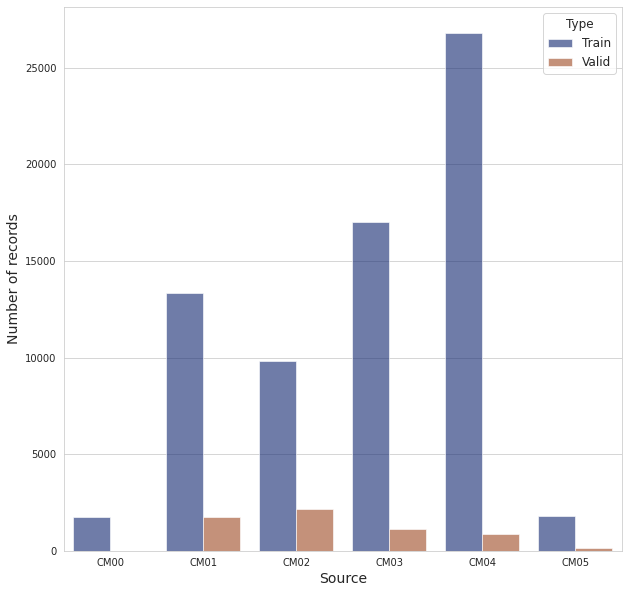

In [38]:
num = []
data_type = []
source = [f'CM0{i}'for i in range(6) for _ in range(2)]

for each_train, each_valid in zip([df.shape[0] for df in train_dfs], [0, *[df.shape[0] for df in valid_dfs]]):
    num.append(each_train)
    num.append(each_valid)
    data_type.append("Train")
    data_type.append("Valid")

plot_df = pd.DataFrame({"Number": num, "Type": data_type, "Source": source})

# draw plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    data=plot_df,
    x="Source",
    y="Number",
    hue="Type",
    ci="sd",
    palette="dark",
    alpha=0.8
)
# for idx, row in plot_df.iterrows():
#     ax.text(x,y, row.Number,color="black", ha='center')
    
plt.xlabel("Source", fontsize=14)
plt.ylabel("Number of records", fontsize=14)
plt.legend(title='Type', fontsize='large', title_fontsize='large', loc=0)

plt.savefig("./plot/number.png", format='png', transparent=True)
plt.show()

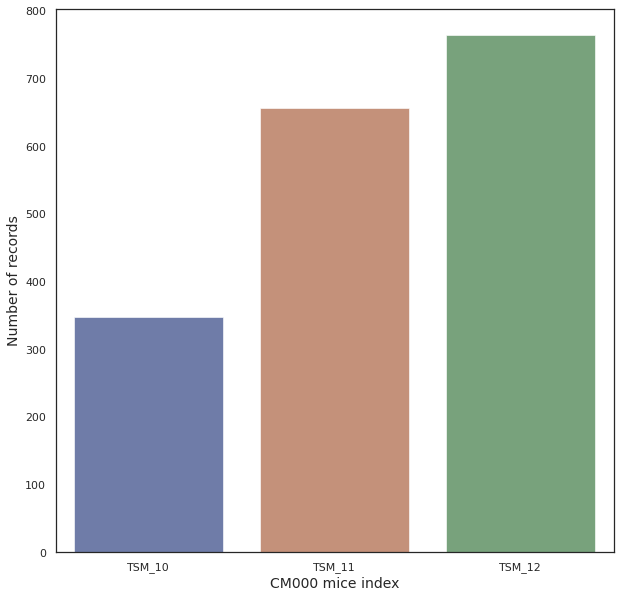

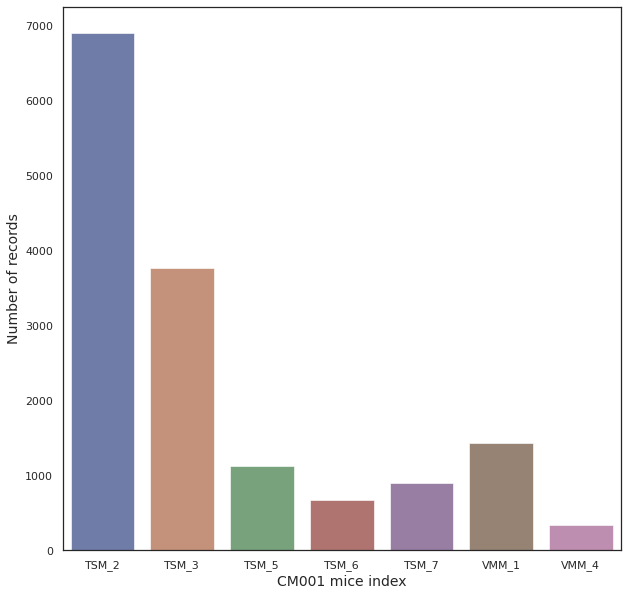

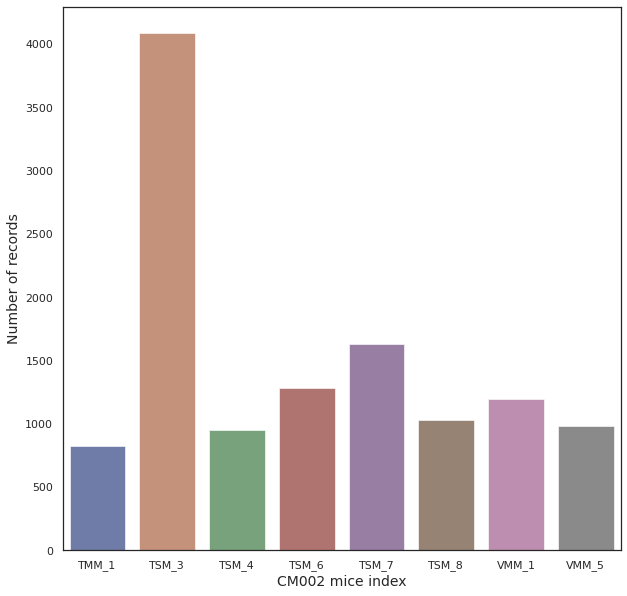

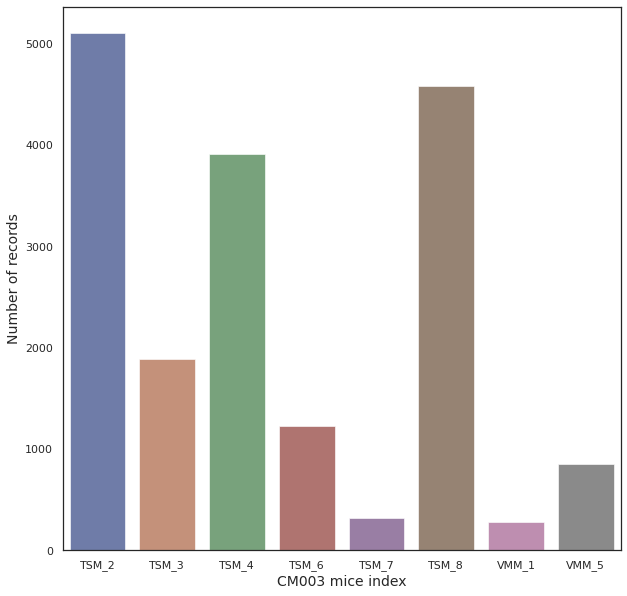

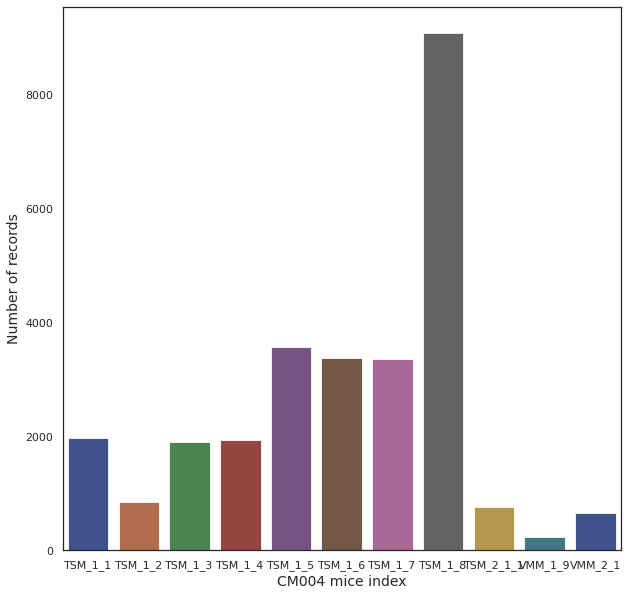

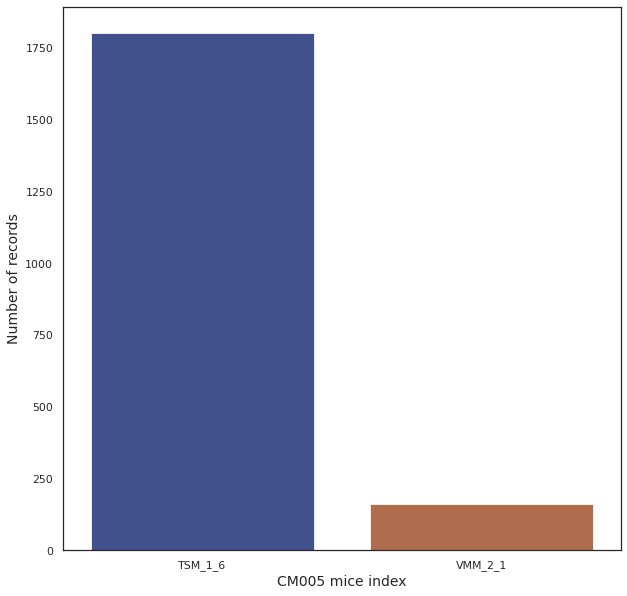

In [432]:
def plot_mice(dataset, label):

    """

    Args:
        dataset (PandaFrame): the dataset
        label (String): the name of the dataset
    """

    mice_index = []
    num = []
    for each_mice in np.unique(dataset["mice_index"].values):
        temp = dataset[dataset["mice_index"] == each_mice]
        mice_index.append(each_mice)
        num.append(len(temp))

    plot_df = pd.DataFrame({"Mice_index": mice_index, "Number": num})
    
    plt.figure(figsize=(10, 10))
    ax = sns.barplot(x="Mice_index", y="Number", data=plot_df, ci="sd", palette="dark", alpha=0.6)
    plt.xlabel(f"{label} mice index", fontsize=14)
    plt.ylabel("Number of records", fontsize=14)
    plt.savefig(f"./plot/{label}_mice.png")
    plt.show()

def plot_mice2(dataset, label):

    """

    Args:
        dataset (PandaFrame): the dataset
        label (String): the name of the dataset
    """

    mice_index = []
    num = []
    for each_mice in np.unique(dataset["stim"].values):
        temp = dataset[dataset["stim"] == each_mice]
        mice_index.append(each_mice)
        num.append(len(temp))

    plot_df = pd.DataFrame({"Mice_index": mice_index, "Number": num})
    
    plt.figure(figsize=(10, 10))
    ax = sns.barplot(x="Mice_index", y="Number", data=plot_df, ci="sd", palette="dark", alpha=0.8)
    plt.xlabel(f"{label} mice index", fontsize=14)
    plt.ylabel("Number of records", fontsize=14)
    plt.savefig(f"./plot/{label}_mice.png")
    plt.show()

plot_mice(train_dfs[0], "CM000")
datas = []
for each_train, each_valid in zip([df for df in train_dfs[1:4]], [df for df in valid_dfs[:3]]):
    sub_df = pd.concat([each_train.loc[:, ["mice_index"]], each_valid.loc[:, ["mice_index"]]], ignore_index=True)
    datas.append(sub_df)
for i, df in enumerate(datas):
    plot_mice(df, f"CM00{i+1}")

datas2 = []
for each_train, each_valid in zip([df for df in train_dfs[4:]], [df for df in valid_dfs[3:]]):
    sub_df = pd.concat([each_train.loc[:, ["stim"]], each_valid.loc[:, ["stim"]]], ignore_index=True)
    datas2.append(sub_df)
for i, df in enumerate(datas2):
    plot_mice2(df, f"CM00{i+4}")

## Clone type数量的分布
如图Fig.5分别展示了不同抗原数据集中不同的clone type数量分布。</br>
<center>
    <img src="./plot/CM001_train_clone_id.png" width="200"/><img src="./plot/CM001_valid_clone_id.png" width="200"/>
</center>
<center>
    <img src="./plot/CM002_train_clone_id.png" width="200"/><img src="./plot/CM002_valid_clone_id.png" width="200"/>
</center>
<center>
    <img src="./plot/CM003_train_clone_id.png" width="200"/><img src="./plot/CM003_valid_clone_id.png" width="200"/>
</center>
<center>
    <img src="./plot/CM004_train_clone_id.png" width="200"/><img src="./plot/CM004_valid_clone_id.png" width="200"/>
</center>
<center>
    <img src="./plot/CM005_train_clone_id.png" width="200"/><img src="./plot/CM005_valid_clone_id.png" width="200"/>
</center>
Figure 5:子图a，b分别代表CM001的训练集和验证集。子图c, d分别代表CM002的训练集和验证集。子图e，f分别代表CM003的训练集和验证集。子图h，i分别代表CM004的训练集和验证集, 子图g，k分别代表CM004的训练集和验证集。x轴代表clone id，y轴代表取对数后序列的数量。</br>

KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

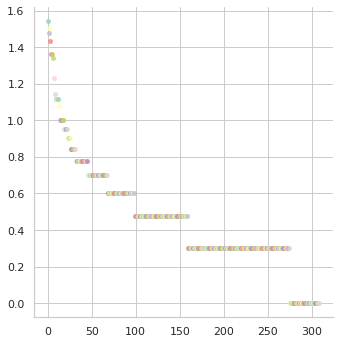

In [433]:
def plot_all_clontype(dataset, label):

    """
    Args:
        dataset (PandaFrame): the dataset
        label (String): name of the dataset
    """
    value_cnt = dataset['clone_id'].value_counts().sort_values(ascending=False)
    plot_df = pd.DataFrame({'clone_id':value_cnt.index, "size": np.log10(value_cnt)})
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    ax = sns.catplot(data=plot_df, x="clone_id", y="size", palette="Set3", order=plot_df['clone_id'], alpha=0.8)
    # ax = sns.scatterplot(data=plot_df, x="clone_id", y="size", palette="deep", alpha=0.6, hue=plot_df['clone_id'],legend=False)
    plt.ylim(0, 8)
    plt.xticks([])
    plt.xlabel(f"{label} Clonotype", fontsize=14)
    plt.ylabel("Log(Clonotype size)", fontsize=14)
    plt.savefig(f'./plot/{label}_clonotype.png')
    plt.show()

for i, df in enumerate(train_dfs):
    plot_all_clontype(df, f'CM00{i}_train')
for i, df in enumerate(valid_dfs):
    plot_all_clontype(df, f'CM00{i+1}_valid')

## 序列长度的分布
如图Fig.6分别展示了抗原特异性抗体与背景抗体的cdr3，cdr2，cdr1区域的长度分布。CM001的特异性抗体的cdr3区域的长度相较于背景抗体的cdr3区域的长度较短。</br>
<center><img src="./plot/CDR1_length.png"></center>
<center><img src="./plot/CDR2_length.png"></center>
<center><img src="./plot/CDR3_length.png"></center>
Figure 6:x轴代表相应区域氨基酸序列的长度。y轴代表分布的density。CM001-CM003选择的是验证集中出现频次大于一次的序列（cdr3区域）。CM0即背景小鼠的序列</br>

----

如图Fig.7展示了抗原特异性抗体与背景抗体的氨基酸序列全长的分布。</br>
<center><img src="./plot/Full_AA_length.png"></center>
Figure 7:x轴代表氨基酸序列的全长。y轴代表分布的density。CM001-CM003选择的是验证集中出现频次大于一的序列（cdr3区域）。CM0即背景小鼠的序列。

<Figure size 720x720 with 0 Axes>

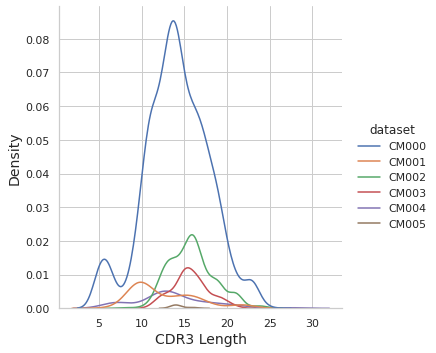

/data/anaconda3/envs/automl/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


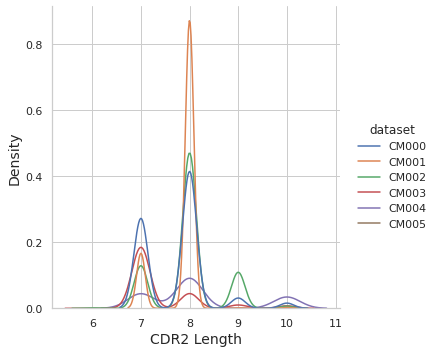

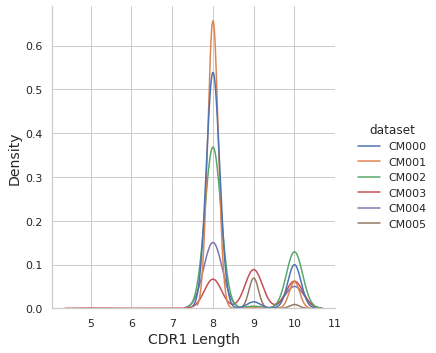

In [111]:
%matplotlib inline

plt.figure(figsize=(10, 10))

def out_valid(df):

    """
    keep the record whose number of occurrence of cdr3 is greater than 1

    Returns:
        pandaSeries：out cdr3, cdr2, cdr1
    """

    value_counts = df["cdr3_aa"].value_counts()
    cdr3 = value_counts[value_counts > 1].index

    subset = df[df["cdr3_aa"].isin(cdr3)]

    cdr2 = subset["cdr2_aa"]
    cdr1 = subset["cdr1_aa"]

    return cdr3, cdr2, cdr1

# data preprocess
CM001_cdr3, CM001_cdr2, CM001_cdr1 = out_valid(valid_dfs[0])
CM002_cdr3, CM002_cdr2, CM002_cdr1 = out_valid(valid_dfs[1])
CM003_cdr3, CM003_cdr2, CM003_cdr1 = out_valid(valid_dfs[2])
CM004_cdr3, CM004_cdr2, CM004_cdr1 = out_valid(valid_dfs[3])
CM005_cdr3, CM005_cdr2, CM005_cdr1 = out_valid(valid_dfs[4])

CM000_cdr3 = train_dfs[0]["cdr3_aa"].values
CM000_cdr2 = train_dfs[0]["cdr2_aa"].values
CM000_cdr1 = train_dfs[0]["cdr1_aa"].values

# prepare data for plotting
temp_cdr3 = [CM000_cdr3, CM001_cdr3, CM002_cdr3, CM003_cdr3, CM004_cdr3, CM005_cdr3]
cdr3 = [len(x) for sub in temp_cdr3 for x in sub]
cdr3_type = (
    ["CM000"] * len(CM000_cdr3) +
    ["CM001"] * len(CM001_cdr3) +
    ["CM002"] * len(CM002_cdr3) +
    ["CM003"] * len(CM003_cdr3) +
    ["CM004"] * len(CM004_cdr3) +
    ["CM005"] * len(CM005_cdr3)
)

temp_cdr2 = [CM000_cdr2, CM001_cdr2, CM002_cdr2, CM003_cdr2, CM004_cdr2, CM005_cdr2]
cdr2 = [len(x) for sub in temp_cdr2 for x in sub]
cdr2_type = (
    ["CM000"] * len(CM000_cdr2) +
    ["CM001"] * len(CM001_cdr2) +
    ["CM002"] * len(CM002_cdr2) +
    ["CM003"] * len(CM003_cdr2) +
    ["CM004"] * len(CM004_cdr2) +
    ["CM005"] * len(CM005_cdr2)
)


temp_cdr1 = [CM000_cdr1, CM001_cdr1, CM002_cdr1, CM003_cdr1, CM004_cdr1, CM005_cdr1]
cdr1 = [len(x) for sub in temp_cdr1 for x in sub]
cdr1_type = (
    ["CM000"] * len(CM000_cdr1) +
    ["CM001"] * len(CM001_cdr1) +
    ["CM002"] * len(CM002_cdr1) +
    ["CM003"] * len(CM003_cdr1) +
    ["CM004"] * len(CM004_cdr1) +
    ["CM005"] * len(CM005_cdr1)
)

# eg: draw the distribution of the length of cdr3
cnt=3
for col1,col2 in [(cdr3,cdr3_type), (cdr2,cdr2_type), (cdr1,cdr1_type)]:
    plot_df = pd.DataFrame({"length": col1, "dataset": col2})
    sns.set_style("whitegrid")
    ax = sns.kdeplot(data=plot_df, x="length", hue="dataset")
    plt.xlabel(f"CDR{cnt} Length", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    # plt.legend(title='Dataset', fontsize='large', title_fontsize='large', loc=0)
    cnt-=1
    plt.savefig(f"./plot/CDR{cnt}_length.png", format='png', transparent=True)

    plt.show()

## 氨基酸频率的分布
如图Fig.8展示了抗原特异性抗体与背景抗体的全长氨基酸序列的不同种类氨基酸频率的分布。我们发现对于不同的抗原，相应的特异性抗体在不同的位置上表现出了一定的偏好。</br>
<center><img src="./plot/aa_compositon_sequence_alignment_aa.png"></center>
Figure 8:x轴代表不同类型的氨基酸。y轴代表每种类型氨基酸的平均占比。不同的颜色分别代表不同的数据集。

---

如图Fig.9分别展示了抗原特异性抗体与背景抗体的cdr1，cdr2，cdr3区域的不同种类氨基酸频率的分布。</br>
<center><img src="./plot/aa_compositon_cdr1_aa.png"></center>
<center><img src="./plot/aa_compositon_cdr2_aa.png"></center>
<center><img src="./plot/aa_compositon_cdr3_aa.png"></center>
Figure 9:x轴代表不同类型的氨基酸。y轴代表每种类型氨基酸的平均占比。不同的颜色分别代表不同的数据集。</br>

<Figure size 720x720 with 0 Axes>

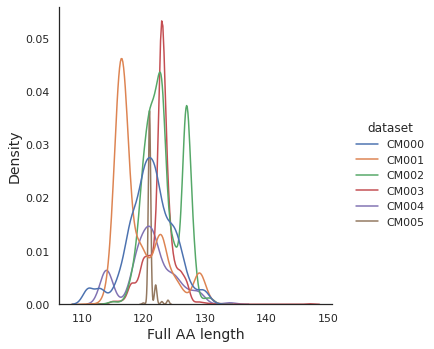

In [123]:
# get the full AA
temp = [train_dfs[0]["sequence_alignment_aa"].values]
temp.extend([df["sequence_alignment_aa"].values for df in valid_dfs])

# prepare for plotting
full_AA_len = [len(x) for sub in temp for x in sub]
data_type = list(chain.from_iterable([[f'CM00{i}']*len(x) for i,x in enumerate(temp)]))

plot_df = pd.DataFrame({"length": full_AA_len, "dataset": data_type})

plt.figure(figsize=(15, 15))
sns.set('white')
sns.displot(data=plot_df, x="length", hue="dataset", kind="kde")
plt.xlabel("Full AA length", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.savefig("./plot/Full_AA_length.png")

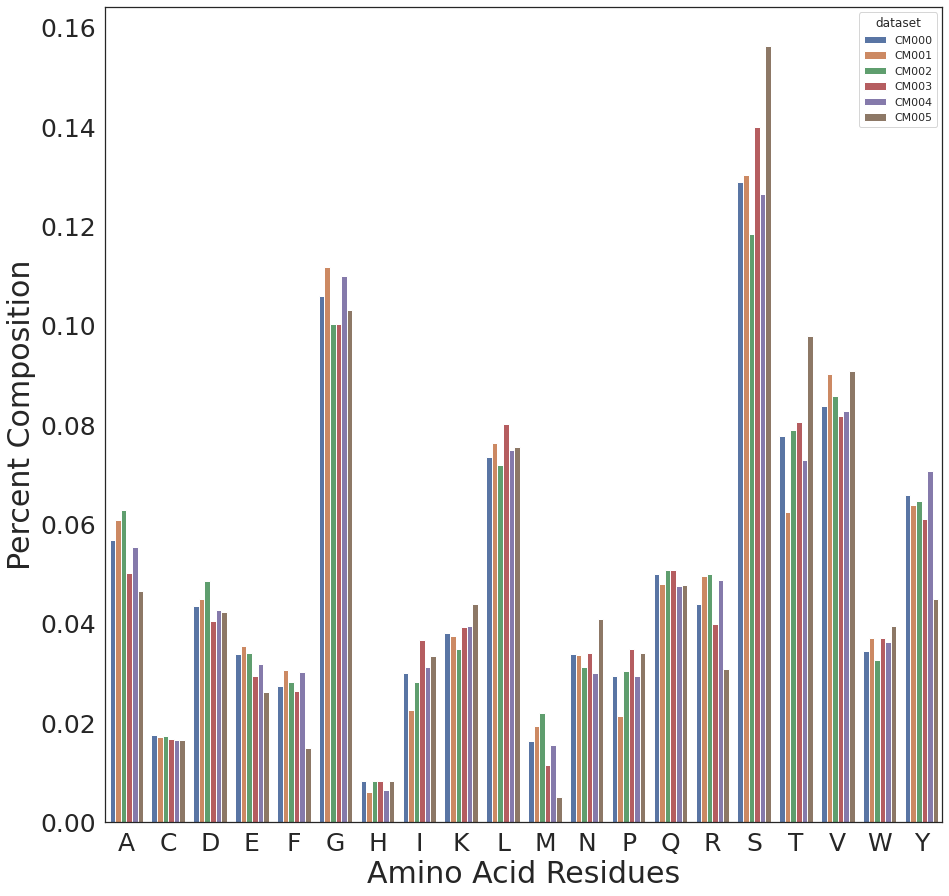

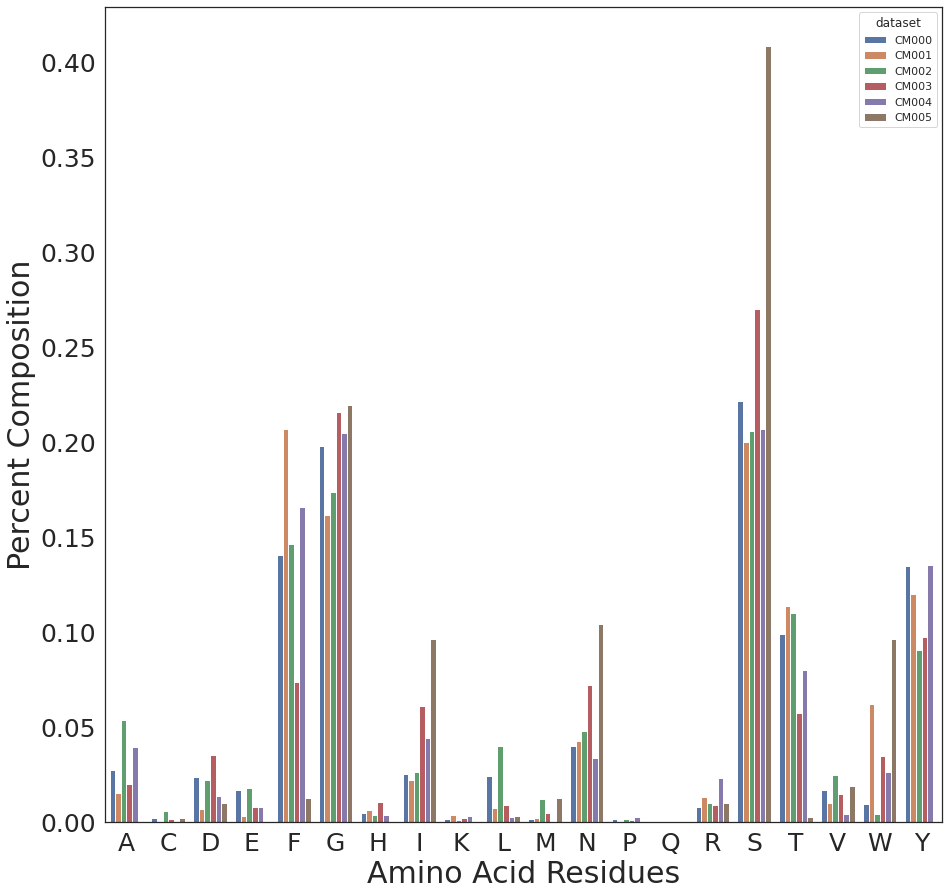

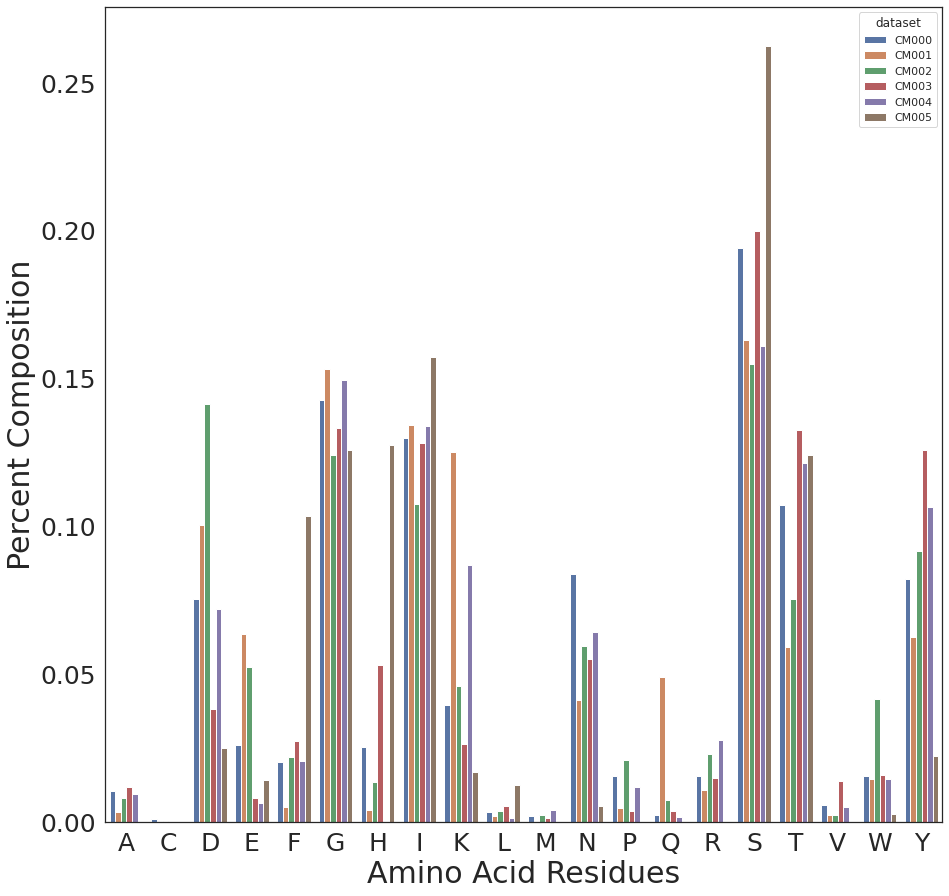

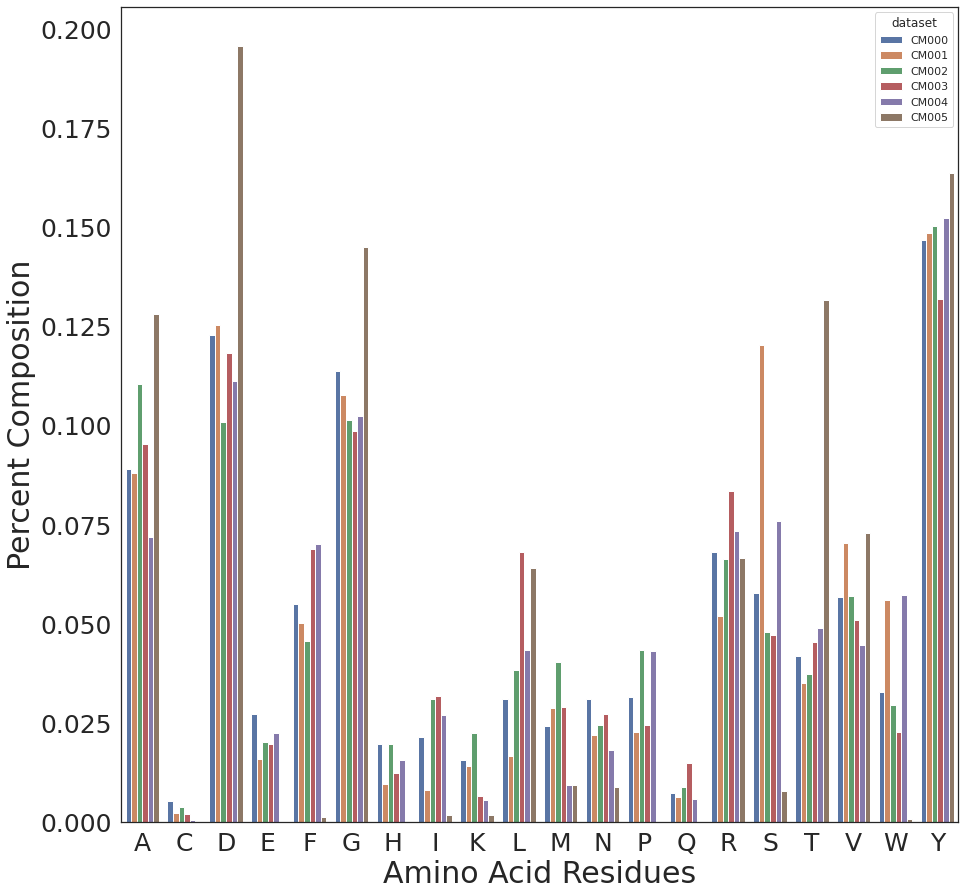

In [178]:
aa_lst = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
aa_vocabulary = 'ACDEFGHIKLMNPQRSTVWY'

used_cols = ['sequence_alignment_aa','cdr1_aa', 'cdr2_aa', 'cdr3_aa']
temp_dfs = [train_dfs[0].loc[:, used_cols]]
temp_dfs.extend([df.loc[:, used_cols] for df in valid_dfs])

for i,df in enumerate(temp_dfs):
    df['source'] = f'CM00{i}'    
    for col in used_cols:
        df[f'{col}_len'] = df[col].apply(lambda x: len(x))
        for aa in aa_lst:
            df[f'{col}_{aa}'] = df[col].apply(lambda x: x.count(aa))

ratios = []
for i,df in enumerate(temp_dfs):
    for col1,col2 in zip([f'{col}_len' for col in used_cols],used_cols):
        aa_cnt = df[col1].sum()
        for aa in aa_lst:
            ratios.append(df[f'{col2}_{aa}'].sum()/aa_cnt)

plot_df = pd.DataFrame({
    'dataset': chain.from_iterable([[f'CM00{i}']*80 for i in range(6)]), # CM000~CM005,共6个数据集
    'seq_type': chain.from_iterable([[col]*20 for col in used_cols]*6), # 4类氨基酸序列
    'aa': aa_lst*24, 
    'ratio': ratios
})

for col in used_cols:
    plt.figure(figsize=(15, 15))
    sns.set(style="white")
    sns.barplot(data=plot_df[plot_df['seq_type']==col], x="aa", y="ratio", hue="dataset",)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(f"{} Amino Acid Residues", size=30)
    plt.ylabel("Percent Composition", size=30)
    plt.savefig(f"./plot/aa_compositon_{col}.png")

## VDJ的分布
如图Fig.10，展示了抗原特异性抗体与背景抗体的V区，D区，J区的基因频率的分布。由图a，b所示，CM001和CM003的特异性抗体的V区，D区表现出了一定的使用偏好性。</br>
<center><img src="./plot/V_distribution.png"></center>
<center><img src="./plot/D_distribution.png"></center>
<center><img src="./plot/J_distribution.png"></center>
Figure 10:x轴代表不同类型的基因的比例。y轴代表Density。不同的颜色分别代表不同的数据集。

---
如图Fig.11，展示了抗原特异性抗体与背景抗体的V区，D区，J区的TOP5基因的频率。由下图所示，CM001和CM003的特异性抗体的V区，D区表现出了一定的使用偏好性。</br>
<center><img src="./plot/V_top5_gene_usage.png"></center>
<center><img src="./plot/D_top5_gene_usage.png"></center>
<center><img src="./plot/J_top5_gene_usage.png"></center>
Figure 11:x轴代表不同类型的基因。y轴代表每种类型基因的平均占比。不同的颜色分别代表不同的数据集。

---

如图Fig.12，展示了CM001数据集中训练集，验证集中的抗体与背景抗体的V区，D区，J区的TOP5基因的频率。</br>
<center><img src="./plot/CM001VSCM000_top5_gene_usage_V.png"></center>
<center><img src="./plot/CM001VSCM000_top5_gene_usage_D.png"></center>
<center><img src="./plot/CM001VSCM000_top5_gene_usage_J.png"></center>
Figure 12:x轴代表不同类型的基因。y轴代表每种类型基因的平均占比。不同的颜色分别代表训练集，验证集和背景小鼠数据集。

---
如图Fig.13，展示了CM002数据集中训练集，验证集中的抗体与背景抗体的V区，D区，J区的TOP5基因的频率。
<center><img src="./plot/CM002VSCM000_top5_gene_usage_V.png"></center>
<center><img src="./plot/CM002VSCM000_top5_gene_usage_D.png"></center>
<center><img src="./plot/CM002VSCM000_top5_gene_usage_J.png"></center>
Figure 13:x轴代表不同类型的基因。y轴代表每种类型基因的平均占比。不同的颜色分别代表训练集，验证集和背景小鼠数据集。

---
如图Fig.14，展示了CM003数据集中训练集，验证集中的抗体与背景抗体的V区，D区，J区的TOP5基因的频率。</br>
<center><img src="./plot/CM003VSCM000_top5_gene_usage_V.png"></center>
<center><img src="./plot/CM003VSCM000_top5_gene_usage_D.png"></center>
<center><img src="./plot/CM003VSCM000_top5_gene_usage_J.png"></center>
Figure 14:x轴代表不同类型的基因。y轴代表每种类型基因的平均占比。不同的颜色分别代表训练集，验证集和背景小鼠数据集。

---
如图Fig.15，展示了CM004数据集中训练集，验证集中的抗体与背景抗体的V区，D区，J区的TOP5基因的频率。</br>
<center><img src="./plot/CM004VSCM000_top5_gene_usage_V.png"></center>
<center><img src="./plot/CM004VSCM000_top5_gene_usage_D.png"></center>
<center><img src="./plot/CM004VSCM000_top5_gene_usage_J.png"></center>
Figure 15:x轴代表不同类型的基因。y轴代表每种类型基因的平均占比。不同的颜色分别代表训练集，验证集和背景小鼠数据集。

---
如图Fig.16，展示了CM005数据集中训练集，验证集中的抗体与背景抗体的V区，D区，J区的TOP5基因的频率。</br>
<center><img src="./plot/CM005VSCM000_top5_gene_usage_V.png"></center>
<center><img src="./plot/CM005VSCM000_top5_gene_usage_D.png"></center>
<center><img src="./plot/CM005VSCM000_top5_gene_usage_J.png"></center>
Figure 16:x轴代表不同类型的基因。y轴代表每种类型基因的平均占比。不同的颜色分别代表训练集，验证集和背景小鼠数据集。

<Figure size 864x864 with 0 Axes>

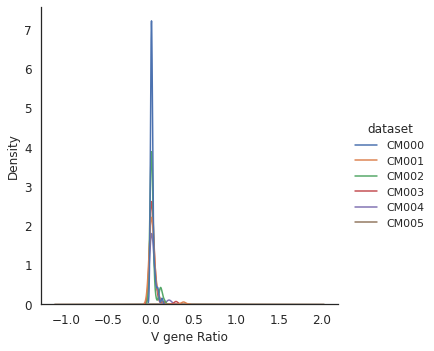

<Figure size 864x864 with 0 Axes>

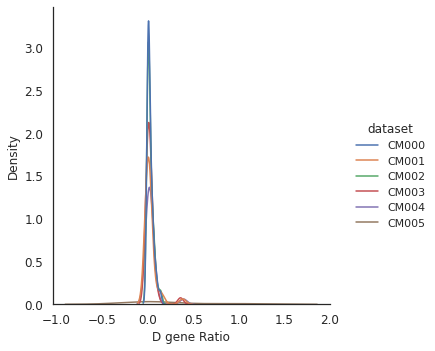

<Figure size 864x864 with 0 Axes>

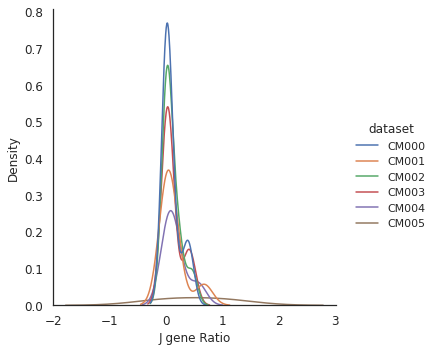

In [434]:
# 所有验证集 VS 背景 

# 计算V,D,J基因的rario
used_cols = ['v_call', 'd_call', 'j_call']
temp_dfs = list(zip([df.loc[:, used_cols] for df in train_dfs], [None, *[df.loc[:, used_cols] for df in valid_dfs]]))

# 每个dataset一个ratio_dict[[CM000_V, CM000_D, CM000_J],[CM001_train_V, CM001_train_D, CM001_train_J, CM001_valid_V, ...],...]
ratio_dict=[]
for dfs in temp_dfs:
    temp_ratio_dict = []
    for col in used_cols:
        dfs[0][f'{col}_temp'] = dfs[0][col].apply(lambda x:x.split(',')[0] if pd.notnull(x) else None)
        temp_ratio_dict.append(dfs[0][f'{col}_temp'].value_counts(normalize=True,dropna=True))
    if dfs[1] is not None:
        for col in used_cols:
            dfs[1][f'{col}_temp'] = dfs[1][col].apply(lambda x:x.split(',')[0] if pd.notnull(x) else None)
            temp_ratio_dict.append(dfs[1][f'{col}_temp'].value_counts(normalize=True,dropna=True))
    ratio_dict.append(temp_ratio_dict)

dataset = []
gene_types = []
genes = []
ratios = []
    
for i,sers in enumerate(ratio_dict):
    if i==0:
        for col_idx, col in enumerate(used_cols):
            dataset.extend([f'CM00{i}']*len(sers[col_idx]))
            gene_types.extend([col]*len(sers[col_idx]))
            genes.extend(list(sers[col_idx].index))
            ratios.extend(list(sers[col_idx].values))
    else:
        for col_idx, col in enumerate(used_cols):
            dataset.extend([f'CM00{i}']*len(sers[col_idx+3]))
            gene_types.extend([col]*len(sers[col_idx+3]))
            genes.extend(list(sers[col_idx+3].index))
            ratios.extend(list(sers[col_idx+3].values))

plot_df = pd.DataFrame({"dataset": dataset, 'gene_type':gene_types ,"gene": genes, "ratio": ratios})

for col in used_cols:
    fig = plt.figure(figsize=(12, 12))
    sns.set(style="white")
    sns.displot(data=plot_df[plot_df['gene_type']==col], x="ratio", hue="dataset", kind="kde")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(f"{col[0].upper()} gene Ratio", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.savefig(f"./plot/{col[0].upper()}_distribution.png")
    # plt.show()

In [293]:
temp_dfs[0][0]

,v_call,d_call,j_call,v_call_temp,d_call_temp,j_call_temp
0,IGHV3-11*06,IGHD6-13*01,IGHJ5*02,IGHV3-11*06,IGHD6-13*01,IGHJ5*02
1,IGHV4-39*01,IGHD1-26*01,IGHJ5*02,IGHV4-39*01,IGHD1-26*01,IGHJ5*02
2,IGHV4-31*03,"IGHD1-20*01,IGHD1-7*01,IGHD1/OR15-1a*01",IGHJ6*02,IGHV4-31*03,IGHD1-20*01,IGHJ6*02
3,IGHV2-70*15,IGHD5-12*01,IGHJ6*02,IGHV2-70*15,IGHD5-12*01,IGHJ6*02
4,IGHV1-3*01,IGHD1-7*01,IGHJ6*02,IGHV1-3*01,IGHD1-7*01,IGHJ6*02
...,...,...,...,...,...,...
1765,IGHV3-33*01,IGHD3-22*01,IGHJ4*02,IGHV3-33*01,IGHD3-22*01,IGHJ4*02
1766,IGHV3-33*01,IGHD3-22*01,IGHJ4*02,IGHV3-33*01,IGHD3-22*01,IGHJ4*02
1767,IGHV3-21*01,IGHD6-19*01,IGHJ4*02,IGHV3-21*01,IGHD6-19*01,IGHJ4*02
1768,IGHV3-21*01,IGHD6-19*01,IGHJ4*02,IGHV3-21*01,IGHD6-19*01,IGHJ4*02


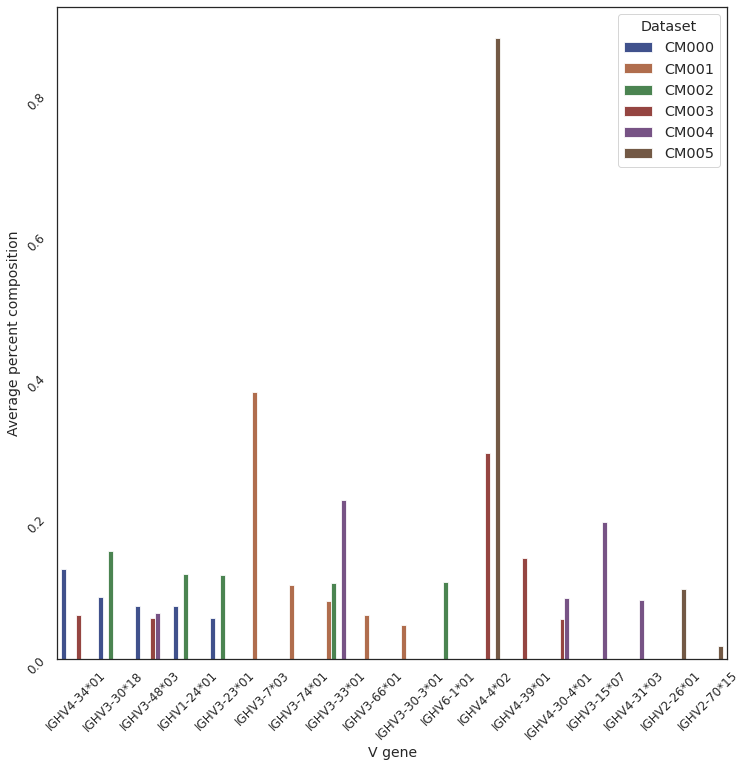

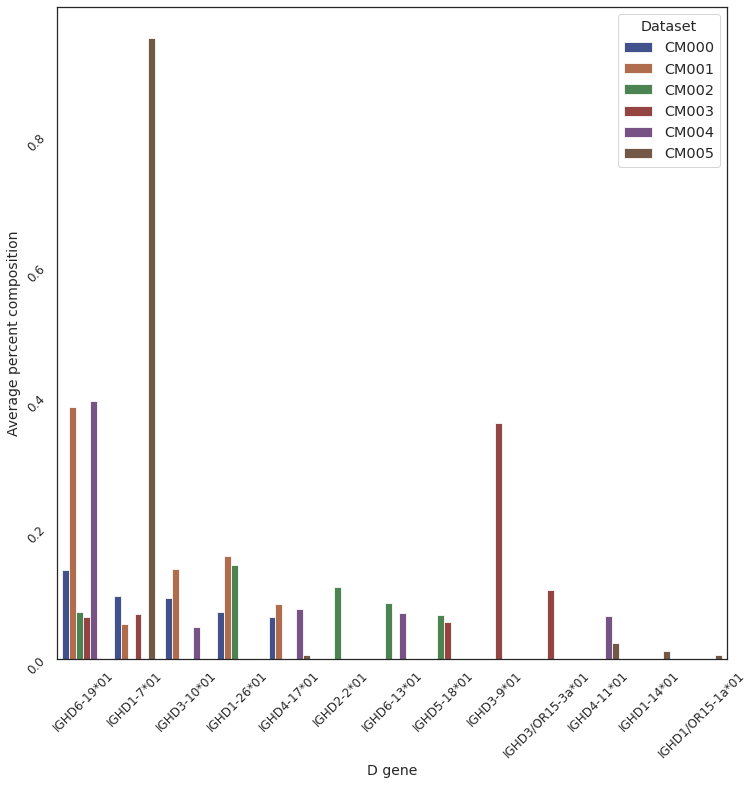

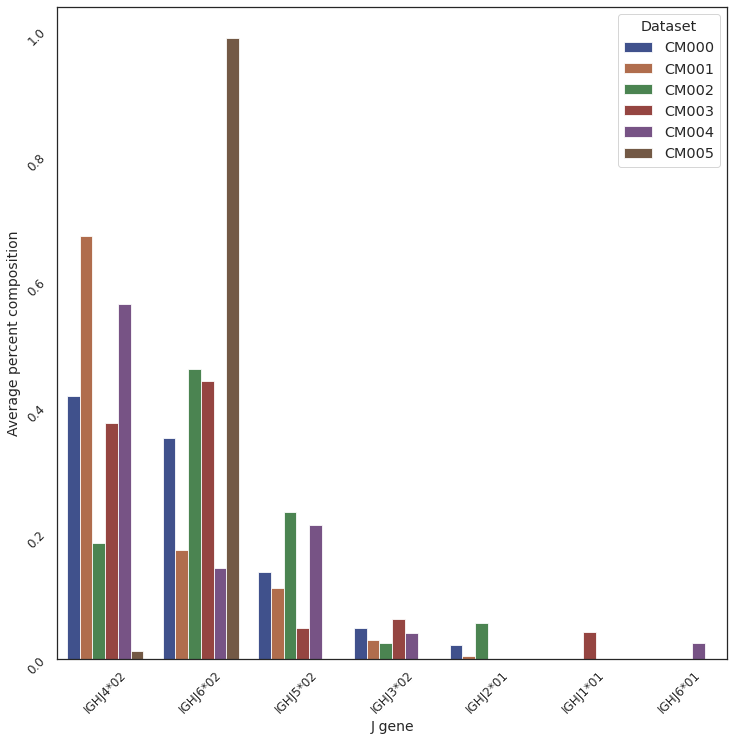

In [294]:
# 每个验证集top5 gene usage VS 背景top5 gene usage

ratio_dict=[]
for dfs in temp_dfs:
    temp_ratio_dict = []
    for col in used_cols:
        dfs[0][f'{col}_temp'] = dfs[0][col].apply(lambda x:x.split(',')[0] if pd.notnull(x) else None)
        temp_ratio_dict.append(dfs[0][f'{col}_temp'].value_counts(normalize=True,dropna=True).head(5))
    if dfs[1] is not None:
        for col in used_cols:
            dfs[1][f'{col}_temp'] = dfs[1][col].apply(lambda x:x.split(',')[0] if pd.notnull(x) else None)
            temp_ratio_dict.append(dfs[1][f'{col}_temp'].value_counts(normalize=True,dropna=True).head(5))
    ratio_dict.append(temp_ratio_dict)

dataset = []
gene_types = []
genes = []
ratios = []

for i,sers in enumerate(ratio_dict):
    if i==0:
        for col_idx, col in enumerate(used_cols):
            dataset.extend([f'CM00{i}']*len(sers[col_idx]))
            gene_types.extend([col]*len(sers[col_idx]))
            genes.extend(list(sers[col_idx].index))
            ratios.extend(list(sers[col_idx].values))
    else:
        for col_idx, col in enumerate(used_cols):
            dataset.extend([f'CM00{i}']*len(sers[col_idx+3]))
            gene_types.extend([col]*len(sers[col_idx+3]))
            genes.extend(list(sers[col_idx+3].index))
            ratios.extend(list(sers[col_idx+3].values))

plot_df = pd.DataFrame({"dataset": dataset, 'gene_type':gene_types ,"gene": genes, "ratio": ratios})

for col in used_cols:
    fig = plt.figure(figsize=(12, 12))
    sns.set(style="white")
    sns.barplot(data=plot_df[plot_df['gene_type']==col], x="gene", y="ratio", hue="dataset", palette="dark", alpha=0.8)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12, rotation=45)
    plt.xlabel(f"{col[0].upper()} gene", fontsize=14)
    plt.ylabel("Average percent composition", fontsize=14)
    plt.legend(title='Dataset', fontsize='large', title_fontsize='large', loc='upper right')
    plt.savefig(f"./plot/{col[0].upper()}_top5_gene_usage.png")
    plt.show()

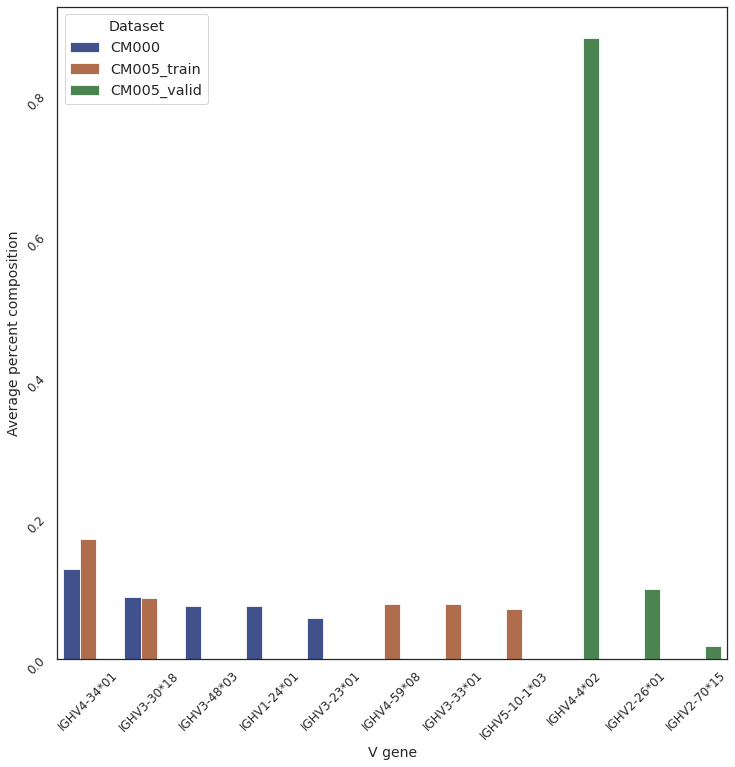

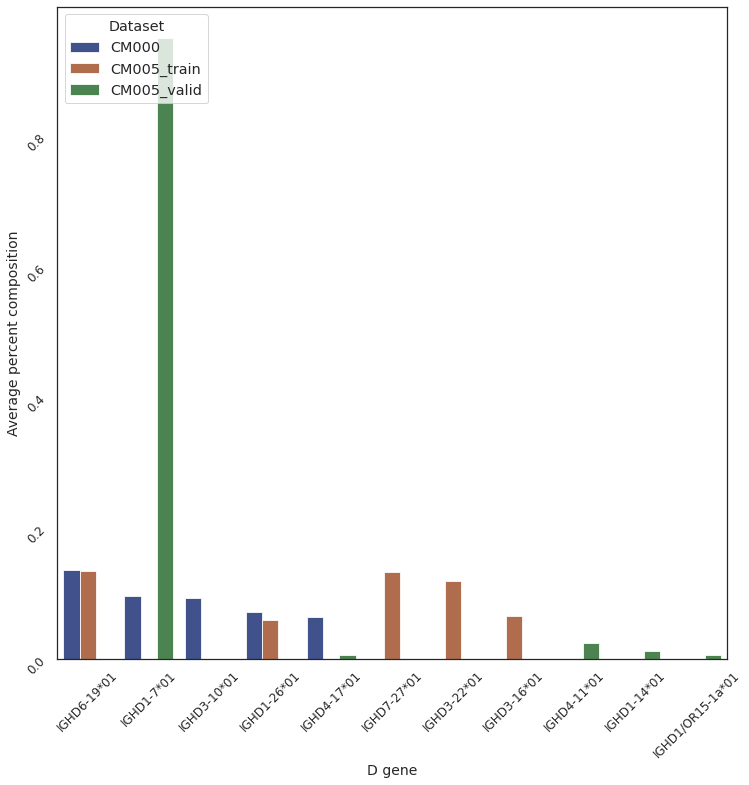

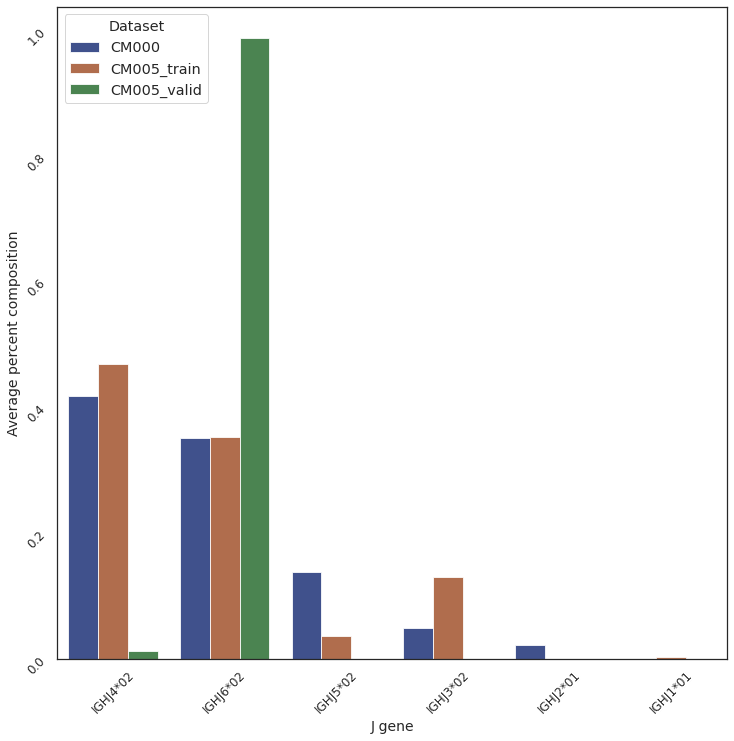

In [347]:
# 每个数据集（训练+验证）top5 gene usage VS CM000 top5 gene usage
dataset = []
gene_types = []
genes = []
ratios = []
for idx in [0, 5]:
    if idx==0:
        for x in range(3):
            dataset.extend(['CM000']*len(ratio_dict[idx][x].index))
            gene_types.extend([used_cols[x]]*len(ratio_dict[idx][x].index))
            genes.extend(list(ratio_dict[idx][x].index))
            ratios.extend(list(ratio_dict[idx][x].values))
    else:
        for x in range(3):
            dataset.extend([f'CM00{idx}_train']*len(ratio_dict[idx][x].index))
            gene_types.extend([used_cols[x]]*len(ratio_dict[idx][x].index))
            genes.extend(list(ratio_dict[idx][x].index))
            ratios.extend(list(ratio_dict[idx][x].values))

            dataset.extend([f'CM00{idx}_valid']*len(ratio_dict[idx][x+3].index))
            gene_types.extend([used_cols[x]]*len(ratio_dict[idx][x+3].index))
            genes.extend(list(ratio_dict[idx][x+3].index))
            ratios.extend(list(ratio_dict[idx][x+3].values))

plot_df = pd.DataFrame({"dataset": dataset, 'gene_type':gene_types ,"gene": genes, "ratio": ratios})

for col in used_cols:
    fig = plt.figure(figsize=(12, 12))
    sns.set(style="white")
    sns.barplot(data=plot_df[plot_df['gene_type']==col], x="gene", y="ratio", hue="dataset", palette="dark", alpha=0.8)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12, rotation=45)
    plt.xlabel(f"{col[0].upper()} gene", fontsize=14)
    plt.ylabel("Average percent composition", fontsize=14)
    plt.legend(title='Dataset', fontsize='large', title_fontsize='large')
    plt.savefig(f"./plot/CM005VSCM000_top5_gene_usage_{col[0].upper()}.png")
    plt.show()

## Ablang embedding可视化结果
如图Fig.16，展示了抗原特异性抗体与背景抗体使用ablang进行embedding后的降维结果。子图a，b，c分别展示了每个抗原数据集内部特异性抗体与背景抗体的降维效果。子图d展示了所有抗原特异性抗体与背景抗体的降维效果（包括CM001-03的数据）。如图所示，使用ablang embedding后的特征一定程度上表现出了区分抗原特异性和非抗原特异性抗体的能力。</br>
<img></br>
Figure 16:x轴代表维度1，y轴代表维度2。蓝色代表背景抗体序列，黄色代表抗原特异性的抗体。CM001-CM003选择的是验证集中出现频次大于一次的序列（cdr3区域）。CM0即背景小鼠的抗体序列。

## 训练集和验证集一起做clone type的结果

如图Fig.17，展示了训练集和验证集数据一起做clone type的结果。子图a展示了背景小鼠每个clone type的size分布。子图b，c，d分别展示了每个抗原中包含有不同来源（即训练集和验证集）序列的clone type。CM001中一共有2139个clonetype，其中82个包含有不同来源的序列。CM002中一共有1699个clonetype，其中63个包含有不同来源的序列。CM003中一共有2326个clonetype，其中36个包含有不同来源的序列。CM00中一共有876个clonetype。</br>
<center>
    <img src="./plot/CM000_clonotype_per_dataset.png" width="300"/>
    <img src="./plot/CM001_clonotype_per_dataset.png" width="300"/>
</center>
<center>
    <img src="./plot/CM002_clonotype_per_dataset.png" width="300"/>
    <img src="./plot/CM003_clonotype_per_dataset.png" width="300"/>
</center>
<center>
    <img src="./plot/CM004_clonotype_per_dataset.png" width="300"/>
    <img src="./plot/CM005_clonotype_per_dataset.png" width="300"/>
</center>
Figure 17:x轴代表clone id，y轴代表每个clone type的数量。蓝色代表来自于验证集序列的数量，橙色代表来自于训练集的序列数量。

In [ ]:
def plot_all_clontype(dataset, label):

    """
    Args:
        dataset (PandaFrame): the dataset
        label (String): name of the dataset
    """
    value_cnt = dataset['clone_id'].value_counts().sort_values(ascending=False)
    plot_df = pd.DataFrame({'clone_id':value_cnt.index, "size": np.log10(value_cnt)})
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    ax = sns.catplot(data=plot_df, x="clone_id", y="size", palette="Set3", order=plot_df['clone_id'], alpha=0.8)
    # ax = sns.scatterplot(data=plot_df, x="clone_id", y="size", palette="deep", alpha=0.6, hue=plot_df['clone_id'],legend=False)
    plt.ylim(0, 8)
    plt.xticks([])
    plt.xlabel("Clonotype", fontsize=14)
    plt.ylabel("Log(Clonotype size)", fontsize=14)
    plt.savefig(f'./plot/{label}_clonotype_per_dataset.png')
    plt.show()

for i, df in enumerate(train_dfs):
    plot_all_clontype(df, f'CM00{i}_train')
for i, df in enumerate(valid_dfs):
    plot_all_clontype(df, f'CM00{i+1}_valid')

In [367]:
for i, df in enumerate(train_dfs):
    df['dataset_type']='train'
for i, df in enumerate(valid_dfs):
    df['dataset_type']='valid'

1 789
2 284
3 1482
4 8299
5 142


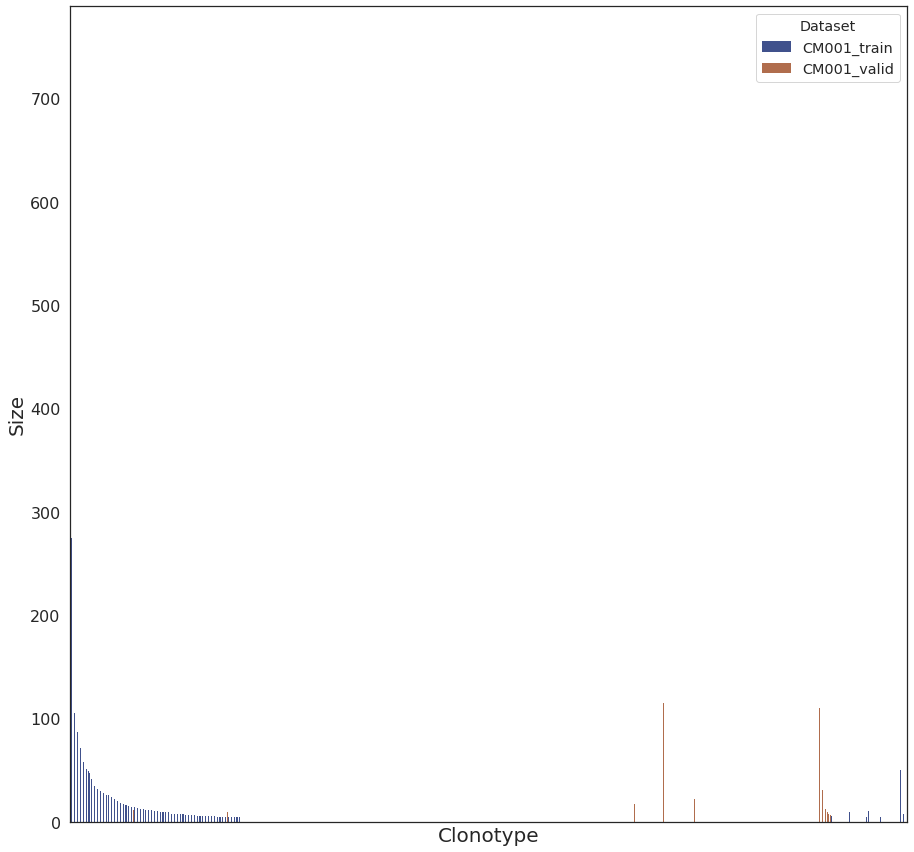

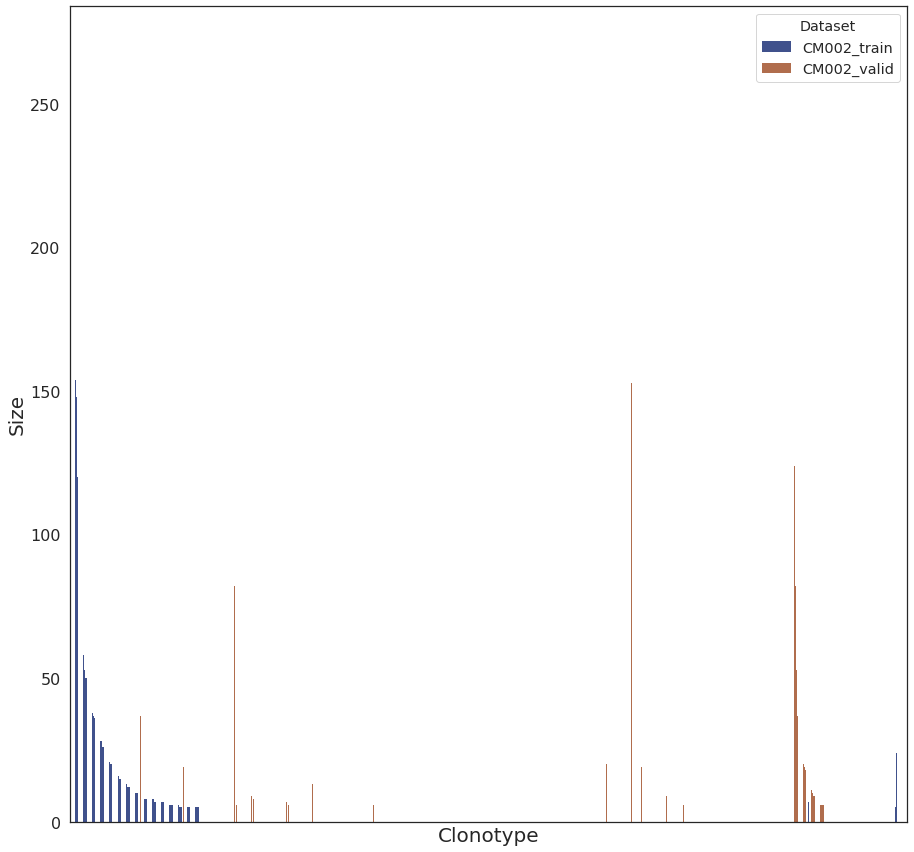

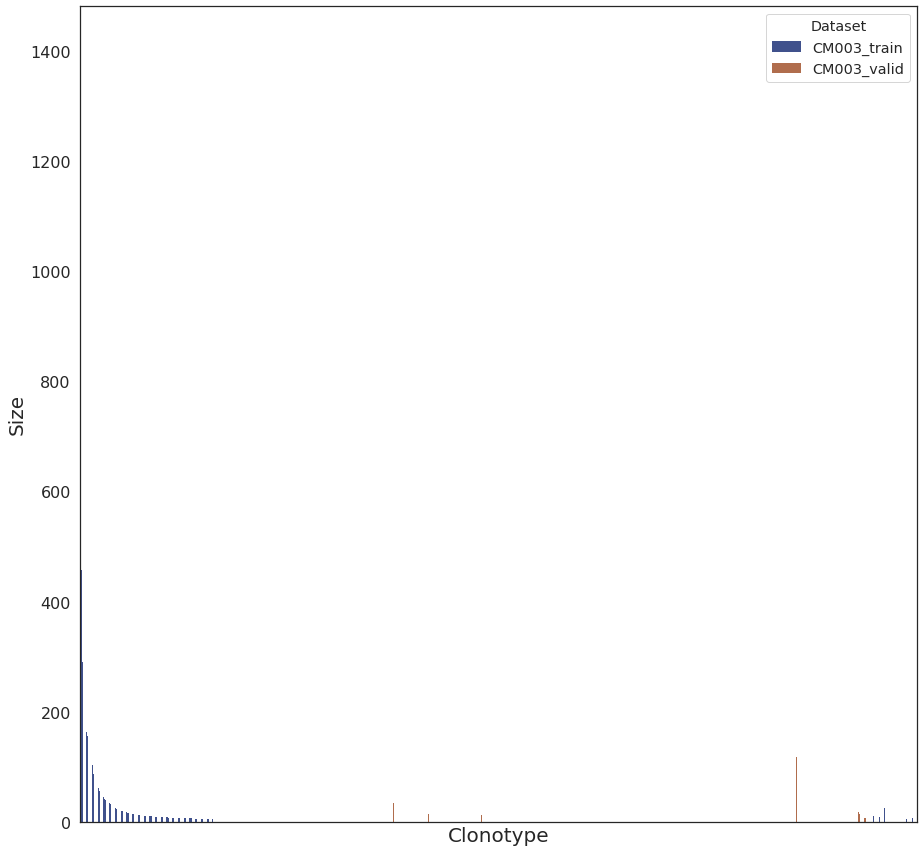

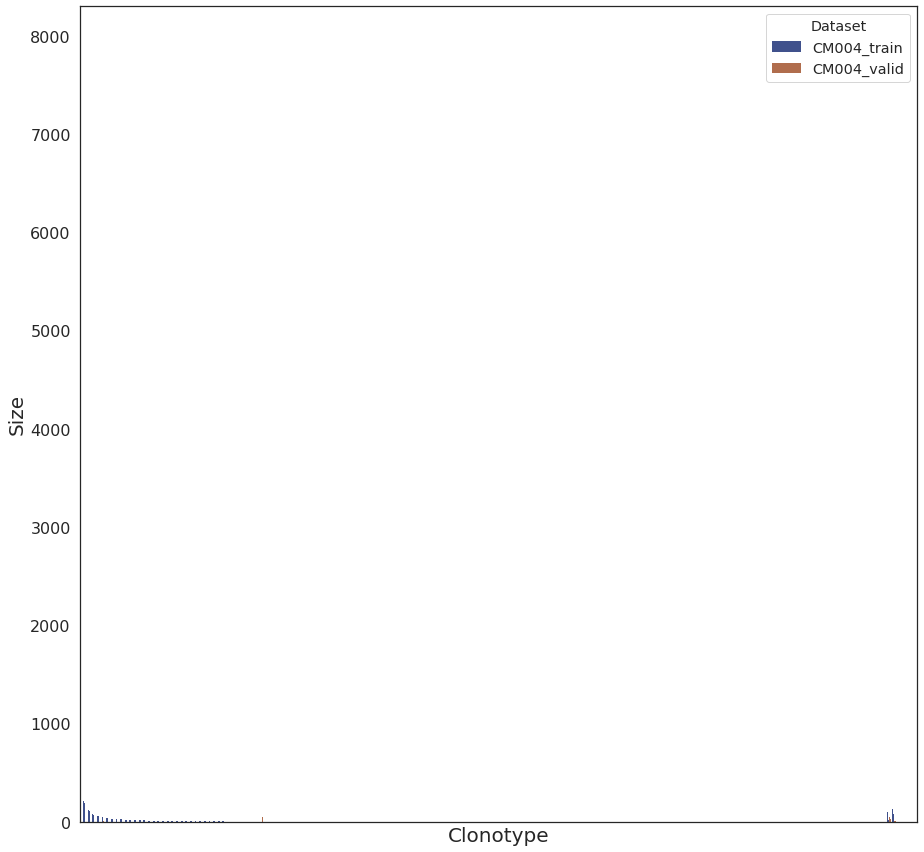

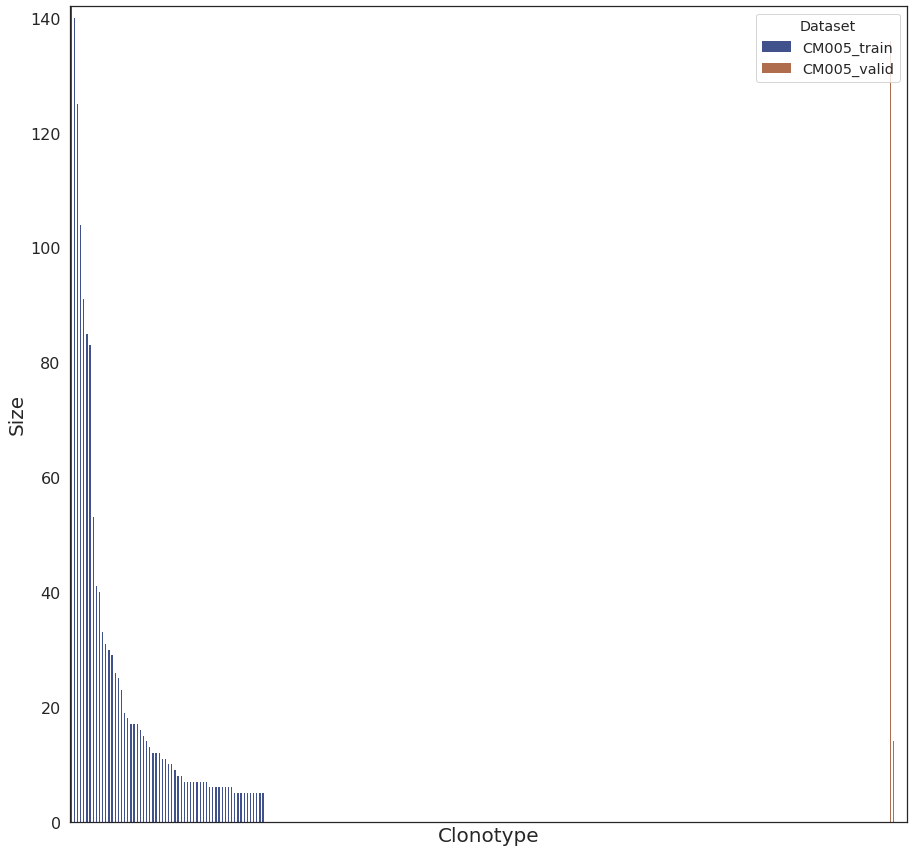

In [435]:
for i in range(1, 6):
    value_cnt1 = train_dfs[i]['clone_id'].value_counts()
    plot_df1 = pd.DataFrame({'clone_id':value_cnt1.index, "size": value_cnt1, 'dataset_type': [f'CM00{i}_train']*len(value_cnt1.index)})
    value_cnt2 = valid_dfs[i-1]['clone_id'].value_counts()
    plot_df2 = pd.DataFrame({'clone_id':value_cnt2.index, "size": value_cnt2, 'dataset_type': [f'CM00{i}_valid']*len(value_cnt2.index)})
    plot_df = pd.concat([plot_df1,plot_df2], ignore_index=True, axis=0)

    # https://stackoverflow.com/questions/60705902/seaborn-not-coloring-bars-in-barplot
    # seaborn显示白色bar, 参数设置lw=0.解决
    plt.figure(figsize=(15, 15))
    sns.set_style('white')
    sns.barplot(data=plot_df[plot_df['size']>=5], x='clone_id', y='size', hue='dataset_type',order=plot_df['clone_id'], palette='dark', alpha=0.8, lw=0.)
    plt.xlabel('Clonotype', fontsize=20)
    plt.ylabel('Size', fontsize=20)
    plt.xticks([], fontsize=16)
    plt.yticks(fontsize=16)
    print(i, plot_df['size'].max())
    plt.ylim(top=plot_df['size'].max())
    plt.legend(title='Dataset', fontsize='large', title_fontsize='large', loc='upper right')
    plt.savefig(f'./plot/CM00{i}_clonotype_per_dataset.png')

## 包含不同来源序列的clone type的cdr3区域的entropy
如图Fig.18，子图a，b，c，d分别展示了每个抗原中包含有不同来源（即训练集和验证集）序列的clone type的cdr3区域的entropy。</br>
<img></br>
Figure 18:x轴代表clone id，y轴代表每个clone type cdr3区域的entropy。
---
如图Fig.19，子图a，b，c，d分别展示了每个抗原数据集（训练集和验证集）中clone type size的分布。</br>
<img></br>
Figure 19:x轴代表clone id，y轴代表每个clone type的size的对数值。
---
如图Fig.20，子图a，b，c分别展示了CM0-3中的V ,D,J的核苷酸序列与germline V,D, J的identidy分布。</br>
<img></br>
Figure 20:x轴代表与germline的identity，y轴代表数量。